In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import numpy.fft
import scipy.signal

In [337]:
#path = "C:/Users/Lenovo/PycharmProjects/pythonProject4/"
#name = "pat00002.txt"
pd_file = pd.read_csv('pat00006.txt', sep=',')
v=pd_file['ECG II-Ref']

In [338]:
type(v)

pandas.core.series.Series

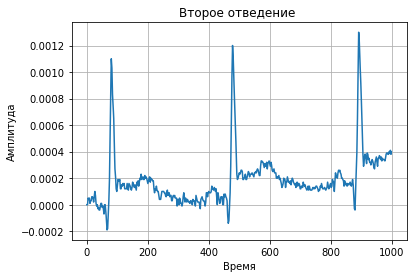

In [339]:
plt.figure()
plt.title("Второе отведение ")
plt.plot(np.arange(0,1000,1),v[0: 1000])
plt.xlabel("Время")
plt.ylabel("Амплитуда")
plt.grid(True)

In [340]:
b, a = scipy.signal.butter(4, 0.07, btype='Low', analog = False )
filtered = scipy.signal.filtfilt(b, a, v)

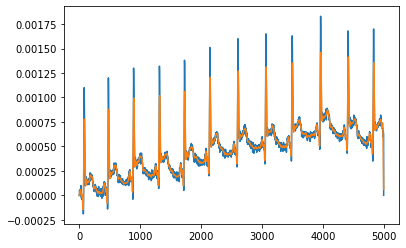

In [341]:
plt.plot(np.arange(0,5000,1), v)
plt.plot(np.arange(0,5000,1), filtered)

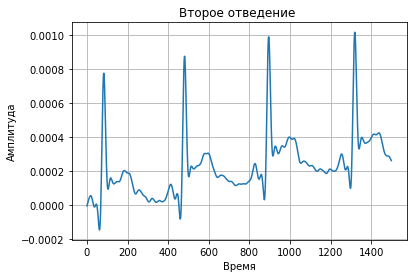

In [342]:
plt.figure()
plt.title("Второе отведение ")
plt.plot(np.arange(0,1500,1),filtered[0: 1500])
plt.xlabel("Время")
plt.ylabel("Амплитуда")
plt.grid(True)

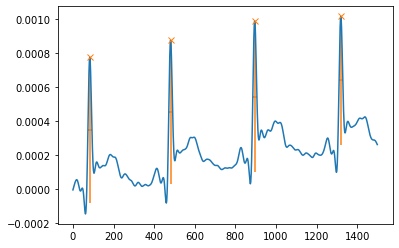

In [343]:
peaks, properties = scipy.signal.find_peaks(filtered[0:1500], prominence=0.0002, width=10, distance = 300)
plt.plot(filtered[0:1500])
plt.plot(peaks, filtered[0:1500][peaks], "x")
plt.vlines(x=peaks, ymin=filtered[0:1500][peaks] - properties["prominences"],
          ymax = filtered[0:1500][peaks], color = "C1")
plt.hlines(y=properties["width_heights"], xmin=properties["left_ips"],
          xmax=properties["right_ips"], color="C1")
plt.show()

In [344]:
properties["right_ips"][0] - properties["left_ips"][0]

20.103417768317456

In [345]:
np.mean(np.diff(np.arange(0,1500,1)[peaks]))

412.0